In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context='poster')
import math

In [2]:
from scipy import stats

In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
import sys
sys.path.append('..')
from model_equations_separate_NC_store_numba import *


In [5]:
morder = ['MIXOTROPH', 'OVERFLOW', 'EXOENZYME',  'ROS',]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6',]# '#d6d4a0',]
#mpalette = sns.color_palette(mpalette)
#morder = [morder[1]] + morder[3:]
#mpalette = [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941)]

In [6]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [7]:
import seaborn_figure_settings

In [8]:
import os
save_dpath = os.path.join('../notebooks/figures/', 'sup_model')
os.makedirs(save_dpath,exist_ok=True)

In [9]:
dpath = '/fast_data/Osnat/RECYCLE_MODEL/results/shgo2/out'
dpath = '../results/final/het'

In [10]:
os.listdir(dpath)

['topruns',
 'cleanup_stats_monte_het_extend_OVERFLOW-ROS-EXOENZYME.csv',
 'versatile_vpros_monte_het_extend_OVERFLOW-EXOENZYME-MIXOTROPH.csv',
 'monte_het_extend_OVERFLOW-EXOENZYME-MIXOTROPH_clean_df.csv.gz',
 'cleanup_stats_monte_het_extend_EXOENZYME.csv',
 'cleanup_stats_monte_het_multi.csv',
 'monte_het_extend_100per_vpro_ROS-MIXOTROPH-OVERFLOW-EXOENZYME_clean_df.csv.gz',
 'monte_het_round2_100per_vpro_ROS_clean_df.csv.gz',
 'monte_het_extend_OVERFLOW_clean_df.csv.gz',
 'versatile_vpros_monte_het_extend_EXOENZYME-MIXOTROPH.csv',
 'monte_het_add_100per_vpro_EXOENZYME_clean_sum.csv.gz',
 'versatile_vpros_monte_het_extend_OVERFLOW-EXOENZYME.csv',
 'predicted_classes_monte_het_add_100per_vpro_ROS.csv.gz',
 'monte_het_extend_100per_vpro_MIXOTROPH_clean_sum.csv.gz',
 'versatile_vpros_monte_het_extend_100per_vpro_MIXOTROPH.csv',
 'monte_het_add_100per_vpro_ROS_clean_df.csv.gz',
 'versatile_vpros_monte_het_extend_OVERFLOW.csv',
 'predicted_classes_monte_het_extend_ROS-MIXOTROPH-OVERFLOW-EX

In [11]:
fnames_predicted_classes = [
    #'predicted_classes_monte_add_het_clean.csv.gz',
    'predicted_classes_monte_het_clean.csv.gz',
    #'predicted_classes_monte_het_add_100per_vpro_EXOENZYME.csv.gz',
    #'predicted_classes_monte_het_add_100per_vpro_OVERFLOW.csv.gz',
    #'predicted_classes_monte_het_add_100per_vpro_ROS.csv.gz',
    'predicted_classes_monte_het_extend_100per_vpro_EXOENZYME.csv.gz',
    'predicted_classes_monte_het_extend_100per_vpro_MIXOTROPH.csv.gz',
    'predicted_classes_monte_het_extend_100per_vpro_OVERFLOW.csv.gz',
    'predicted_classes_monte_het_extend_100per_vpro_ROS.csv.gz',
    'predicted_classes_monte_het_extend_EXOENZYME.csv.gz',
    'predicted_classes_monte_het_extend_MIXOTROPH.csv.gz',
    'predicted_classes_monte_het_extend_OVERFLOW.csv.gz',
    'predicted_classes_monte_het_extend_ROS.csv.gz',
    'predicted_classes_monte_het_multi.csv.gz',
    #'predicted_classes_monte_het_round2_100per_vpro_ROS.csv.gz',
    #'predicted_classes_monte_ROS_round2_het.csv.gz',
]

In [12]:
fnames_mse = [
    #'monte_add_het_clean_clean_mse.csv.gz',
    #'monte_het_add_100per_vpro_EXOENZYME_clean_mse.csv.gz',
    #'monte_het_add_100per_vpro_OVERFLOW_clean_mse.csv.gz',
    #'monte_het_add_100per_vpro_ROS_clean_mse.csv.gz',
    'monte_het_clean_clean_mse.csv.gz',
    # 'monte_het_extend_100per_vpro_EXOENZYME_clean_mse.csv.gz',
    # 'monte_het_extend_100per_vpro_MIXOTROPH_clean_mse.csv.gz',
    # 'monte_het_extend_100per_vpro_OVERFLOW_clean_mse.csv.gz',
    # 'monte_het_extend_100per_vpro_ROS_clean_mse.csv.gz',
    'monte_het_extend_EXOENZYME_clean_mse.csv.gz',
    'monte_het_extend_MIXOTROPH_clean_mse.csv.gz',
    'monte_het_extend_OVERFLOW_clean_mse.csv.gz',
    'monte_het_extend_ROS_clean_mse.csv.gz',
    'monte_het_multi_clean_mse.csv.gz',
    #'monte_het_round2_100per_vpro_ROS_clean_mse.csv.gz',
    #'monte_ROS_round2_het_clean_mse.csv.gz',
]

In [13]:
fnames_mse2 = [
    'monte_het_extend_100per_vpro_EXOENZYME_clean_mse.csv.gz',
    'monte_het_extend_100per_vpro_MIXOTROPH_clean_mse.csv.gz',
    'monte_het_extend_100per_vpro_OVERFLOW_clean_mse.csv.gz',
    'monte_het_extend_100per_vpro_ROS_clean_mse.csv.gz',
]

In [14]:
dpath2 = '../results/multi/extend/het_100per_vpro/clean'
mse_df2 = pd.concat([pd.read_csv(os.path.join(dpath2, f)) for f in fnames_mse2], ignore_index=True)
#sum_df = sum_df.loc[sum_df.model.]

In [15]:
mse_df = pd.concat([pd.read_csv(os.path.join(dpath, f)) for f in fnames_mse], ignore_index=True)


In [16]:
mse_df = pd.concat([mse_df, mse_df2], ignore_index=True)

In [17]:
mse_df = mse_df.drop(columns=['Unnamed: 0'])

In [18]:
predicted_classes_df = pd.concat([pd.read_csv(os.path.join(dpath, f)) for f in fnames_predicted_classes], ignore_index=True)



In [19]:
mse_df = mse_df.loc[mse_df.run_id.isin(predicted_classes_df.run_id)].copy()


In [20]:
mse_df['RMSE'] = np.sqrt(mse_df['RMSE'])

In [21]:
min_mse_df = mse_df.loc[mse_df.groupby('run_id')['RMSE'].idxmin()]

In [22]:
predicted_classes_df = predicted_classes_df.loc[predicted_classes_df.model.isin(morder)].copy()


In [23]:
df = pd.merge(predicted_classes_df, min_mse_df, on=['run_id'], how='left', suffixes=['', '_min'])

In [24]:
df.loc[df.Group_min.isin(['Axenic']), 'Group_min'] = 'Neutral'

In [25]:
df.head()

,run_id,y_pred,max_prob,idx,media,which,model,hash,VPRO,Unnamed: 0,...,compare_points,RMSE,RMSE_filled,Sample_min,full name_min,Group_min,RMSE_Bptotal[N]_min,RMSE_Bptotal[C]_min,compare_points_min,RMSE_min
0,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,0.974799,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1,1093634.0,...,74.0,261.836489,261.836489,10C0,Marinovum 5F3,Weak,4.328551,45.455198,74.0,14.026943
1,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,Neutral,0.978219,monte_EXOENZYME_100_monte_vpro_13_69_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,vpro_13_69_EXOENZYME_C1,362004.0,...,74.0,762.999051,762.999051,7B0,Sulfitobacter pseudonitzschiae,Sustained,2.548766,24.861325,74.0,7.960258
2,monte_EXOENZYME_100_monte_vpro_17_89_EXOENZYME...,Weak,0.989989,monte_EXOENZYME_100_monte_vpro_17_89_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,vpro_17_89_EXOENZYME_C2,1405250.0,...,74.0,86.651652,86.651652,10C0,Marinovum 5F3,Weak,3.327162,26.043711,74.0,9.308687
3,monte_EXOENZYME_100_monte_vpro_17_89_EXOENZYME...,Weak,0.989961,monte_EXOENZYME_100_monte_vpro_17_89_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,vpro_17_89_EXOENZYME_C2,599432.0,...,74.0,92.274274,92.274274,10C0,Marinovum 5F3,Weak,3.457849,26.685452,74.0,9.605950
4,monte_EXOENZYME_100_monte_vpro_19_83_EXOENZYME...,Sustained,0.377493,monte_EXOENZYME_100_monte_vpro_19_83_EXOENZYME...,lowN,all,EXOENZYME,h8519271514136708373,vpro_19_83_EXOENZYME_C1,1430440.0,...,74.0,97.175740,97.175740,7B0,Sulfitobacter pseudonitzschiae,Sustained,3.327543,29.203448,74.0,9.857776


In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [27]:
sns.set_context('paper')

In [28]:
gorder

['Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral', 'Other']

In [29]:
confusion_matrix(df.Group_min, df.y_pred, labels=gorder)

array([[  672,   871,     0,     0,     5,    38],
       [    0,  1294,     1,  1904, 10216,   283],
       [    0,     0,    59,    66,    19,     0],
       [    0,  1019,    46, 66560,  9083,   652],
       [  596,  6850,     0, 10021, 51985,  9239],
       [    0,     0,     0,     0,     0,     0]])

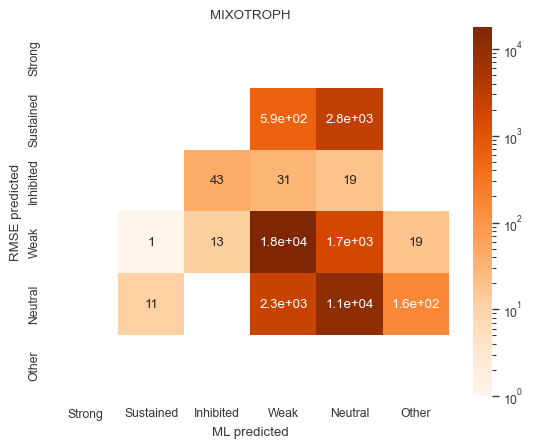

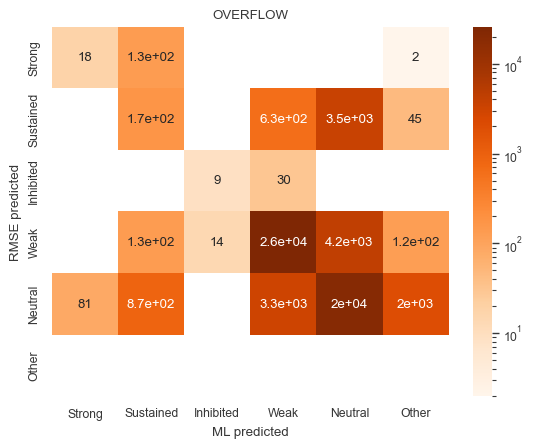

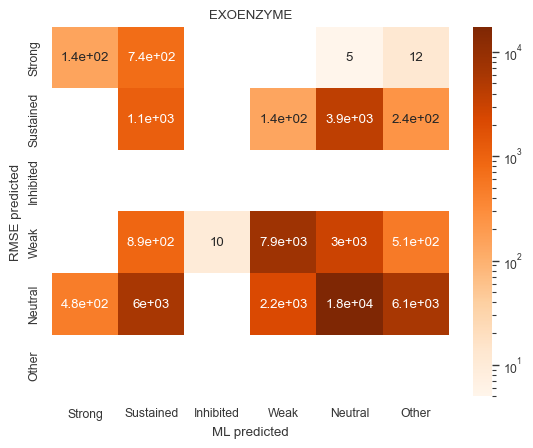

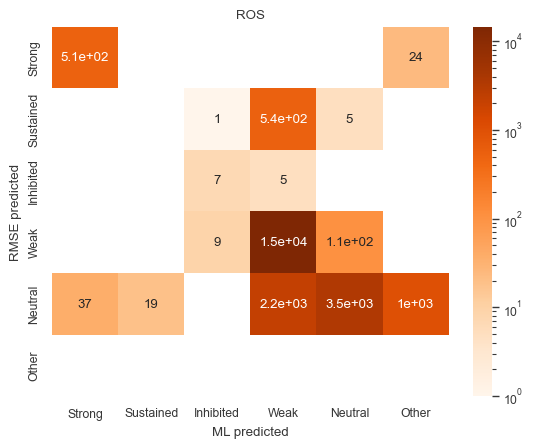

In [31]:
from matplotlib.colors import LogNorm, Normalize
for m in morder:
    tdf = df.loc[df.model.isin([m])]
    matrix = confusion_matrix(tdf.Group_min, tdf.y_pred, labels=gorder)
    sns.heatmap(
        matrix, annot=True, norm=LogNorm(),
        xticklabels=gorder, yticklabels=gorder, cmap='Oranges',
        
    )
    #ConfusionMatrixDisplay.from_predictions(tdf.Group_min, tdf.y_pred, labels=gorder)
    plt.title(m)
    plt.ylabel('RMSE predicted')
    plt.xlabel('ML predicted')
    plt.show()

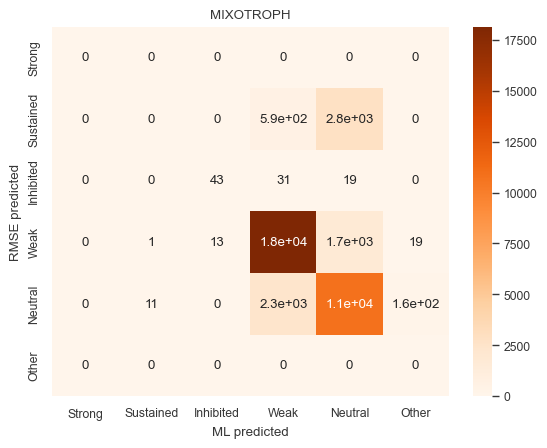

AttributeError: 'Axes' object has no attribute 'savefig'

In [42]:
from matplotlib.colors import LogNorm, Normalize
for m in morder:
    tdf = df.loc[df.model.isin([m])]
    matrix = confusion_matrix(tdf.Group_min, tdf.y_pred, labels=gorder)
    g = sns.heatmap(
        matrix, annot=True, #norm=LogNorm(),
        xticklabels=gorder, yticklabels=gorder, cmap='Oranges',
        
    )
    #ConfusionMatrixDisplay.from_predictions(tdf.Group_min, tdf.y_pred, labels=gorder)
    plt.title(m)
    plt.ylabel('RMSE predicted')
    plt.xlabel('ML predicted')
    plt.show()
    save_fpath = os.path.join(save_dpath, f'sup_confusion_{m}.svg')
    g.savefig(save_fpath)
    

In [33]:
df['pred_agree'] = 'Disagree'
df.loc[df.Group_min == df.y_pred, 'pred_agree'] = 'Agree'

In [34]:
df['agree'] = 0
df.loc[df.Group_min == df.y_pred, 'agree'] = 1

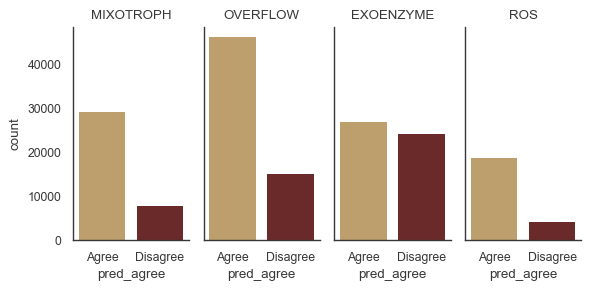

In [43]:
aorder = ['Agree', 'Disagree']
apalette = ['#c9a35f', '#761f1f']
g = sns.catplot(
    data=df,
    col='model', col_order=morder,
    x='pred_agree',
    kind='count',
    order=aorder, 
    hue_order=aorder, palette=apalette,
    hue='pred_agree', dodge=False, legend=False,
    aspect=0.5, height=3,
).set_titles(col_template='{col_name}')
save_fpath = os.path.join(save_dpath, 'sup_RMSE_ML_agreement.svg')
g.savefig(save_fpath)


In [36]:
df.groupby('model').agree.mean()

model
EXOENZYME    0.525349
MIXOTROPH    0.790302
OVERFLOW     0.753611
ROS          0.824666
Name: agree, dtype: float64